### Notes
* https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
* http://scikit-learn.org/stable/modules/manifold.html#t-sne
* http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
* https://www.kaggle.com/thykhuely/mercari-interactive-eda-topic-modelling
* https://www.dataquest.io/blog/build-a-data-science-portfolio/
* https://www.youtube.com/watch?v=NEaUSP4YerM
* http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
* https://www.stat.berkeley.edu/~spector/s133/Clus.html
* https://stats.stackexchange.com/questions/10540/how-to-interpret-mean-of-silhouette-plot
* Visualize clusters with and without tSNE
* Need to understand how to explain the variance of costs within the clusters
* Need to plot silhouette charts

In [218]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import seaborn as sns
from nltk import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from string import punctuation
from sklearn.decomposition import PCA
import re
%matplotlib inline

In [219]:
file = 'http://bit.ly/aqmd-violations-final'
titlev = 'http://bit.ly/aqmd-titlev'
reclaim = 'http://bit.ly/aqmd-reclaim'

In [220]:
df_all = pd.read_csv(file)
df_titleV = pd.read_csv(titlev)
df_reclaim = pd.read_csv(reclaim)

In [221]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN


In [222]:
df_all['facility_type'] = ''

In [223]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,


In [224]:
df_titleV.head()

,Facility ID,Facility Name,City,County,Initial Issue Date,Renewal Date
0,35188,3M COMPANY,MONROVIA,LA,6/17/13,NaN
1,800088,3M COMPANY,CORONA,RV,5/9/00,5/4/12
2,45489,"ABBOTT CARDIOVASCULAR SYSTEMS, INC.",TEMECULA,RV,10/26/01,1/11/12
3,47084,ADVANCE PAPER BOX CO,LOS ANGELES,LA,8/13/01,9/16/11
4,57390,ADVANCE TRUCK PAINTING INC,PICO RIVERA,LA,4/16/01,6/7/11


In [225]:
df_reclaim.head()

,Fac_id
0,136
1,346
2,550
3,1073
4,1744


In [226]:
reclaim_list = df_reclaim['Fac_id'].tolist()

In [227]:
titlev_list = df_titleV['Facility ID'].tolist()

In [228]:
reclaim_titlev_list = [facility for facility in titlev_list if facility in reclaim_list]

In [229]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
list_error

[facility id                                                  16, 20
 notification                                                 P57290
 Attorney                                                        WBW
 Total                                                         40000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data    failure to conduct NOx emissions checks monthl...
 equipment                                                       NaN
 facility_type                                                      
 Name: 475, dtype: object,
 facility id                                                  16, 20
 notification                                                 P57290
 Attorney                                                        FAC
 Total                                                         40000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data    failure to conduct NOx emissions checks monthl...
 equipm

In [230]:
for each in list_error:
    print(each['facility id'])

16, 20
16, 20
16, 20
2344 2
202, 2
31, 20
31, 20
10/1
10/1
10/1


In [231]:
for each in list_error:
    print(each['notification'])

P57290
P57290
P57290
P63673
HRB2169
SRV97
SRV97
HRB2187
HRB2191
HRB2191


In [232]:
df_all.iloc[475]['facility id']
df_all.set_value(475, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [233]:
df_all.iloc[476]
df_all.set_value(476, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [234]:
df_all.iloc[477]
df_all.set_value(477, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [235]:
df_all.iloc[1284]
df_all.set_value(1284, 'facility id', '2344')

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [236]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
list_error

[facility id                                                  202, 2
 notification                                                HRB2169
 Attorney                                                        INT
 Total                                                          1000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data                                                  NaN
 equipment                                                       NaN
 facility_type                                                      
 Name: 1695, dtype: object,
 facility id                                                  31, 20
 notification                                                  SRV97
 Attorney                                                        WBW
 Total                                                        213376
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data                                                  NaN
 equip

In [237]:
for each in list_error:
    print(each['facility id'])

202, 2
31, 20
31, 20
10/1
10/1
10/1


In [238]:
for each in list_error:
    print(each['notification'])

HRB2169
SRV97
SRV97
HRB2187
HRB2191
HRB2191


In [239]:
df_all.drop(df_all.index[1695])

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [240]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
        print(index)

1695
2066
2067
3138
3140
3141


In [241]:
df_all = df_all.drop(df_all.index[[1695,
2066,
2067,
3138,
3140,
3141]])

In [242]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
        print(index)

In [243]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,


In [244]:
index_row = []
for index, row in df_all.iterrows():
    try:
        if float(row['facility id']) in titlev_list:
            df_all.set_value(index, 'facility_type', 't')
        elif float(row['facility id']) in reclaim_list:
            df_all.set_value(index, 'facility_type', 'r')
        else:
            df_all.set_value(index, 'facility_type', 'n')
    except:
        index_row.append(row)
index_row

[]

In [245]:
index_row = []
for index, row in df_all.iterrows():
    try:
        if float(row['facility id']) in reclaim_titlev_list:
            df_all.set_value(index, 'facility_type', 'rt')
    except:
        index_row.append(row)
index_row

[]

In [246]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,rt
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,t
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,t
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,n


In [247]:
df_all.shape

(3682, 8)

In [248]:
df_rt = df_all[(df_all['facility_type'] == 'rt')]
df_rt.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,rt
19,11034,P55543,TRB,1000.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,The electronic report of daily mass emissions ...,NaN,rt
20,800026,SRV105,KCM,71200.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,NaN,NaN,rt
69,800408,P59376,TRB,1000.0,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating Device #C160 contrary to permit cond...,NaN,rt


In [249]:
df_facility_average = df_all.groupby(['facility_type'], as_index=False).mean()
df_facility_average

,facility_type,Total
0,n,11762.097454
1,r,38479.358108
2,rt,523801.033898
3,t,446882.295084


In [250]:
punctuation_symbols = []
for each in list(punctuation):
    punctuation_symbols.append((each))

In [251]:
set(df_all['facility_type'].tolist())

{'n', 'r', 'rt', 't'}

In [252]:
len(df_all['facility_type'].tolist())

3682

In [253]:
df_all = df_all.dropna(subset=['violation_data'])
df_all.shape

(3336, 8)

In [254]:
def remove_puncuation(d):
    for each in punctuation_symbols:
        d = d.replace(each, '')
    return d

In [255]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

In [256]:
df_all['violation_data'] = df_all.violation_data.apply(remove_digits)
df_all['violation_data'] = df_all.violation_data.apply(remove_puncuation)
df_all['violation_data'] = df_all['violation_data'].str.lower()

In [257]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n


In [294]:
df_all['trim_violation_text'] = ''
for index, row in df_all.iterrows():
    df_all.set_value(index, 'trim_violation_text', re.sub(r' +', ' ', str(row['violation_data'])))
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type,trim_violation_text,violation_length
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt,failed to reconcile quarterly nox emissions in...,42
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt,inaccurate qcers inaccurate apep,4
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t,failure to keep the roof of internal floating ...,22
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t,failure to operate and maintain a continuous m...,14
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n,selling architectural coatings within the scaq...,25


In [428]:
df_all['violation_data'].isnull().sum()

0

In [406]:
facility_type_ = dict()
type_list = ['rt', 't', 'r', 'n']
for each in type_list:
    text = ' '.join(df_all.loc[df_all['facility_type'] == each, 'trim_violation_text'].values)
    facility_type_[each] = word_tokenize(text)

In [407]:
none_top100 = Counter(facility_type_['n']).most_common(100)
reclaim_top100 = Counter(facility_type_['r']).most_common(100)
titlev_top100 = Counter(facility_type_['t']).most_common(100)
reclaim_titlev_top100 = Counter(facility_type_['rt']).most_common(100)

In [408]:
def create_wordcloud(d):
    wordcloud = WordCloud(background_color='white',
                          max_words=75, 
                          max_font_size=40,
                          random_state=42).generate(str(d))
    return wordcloud

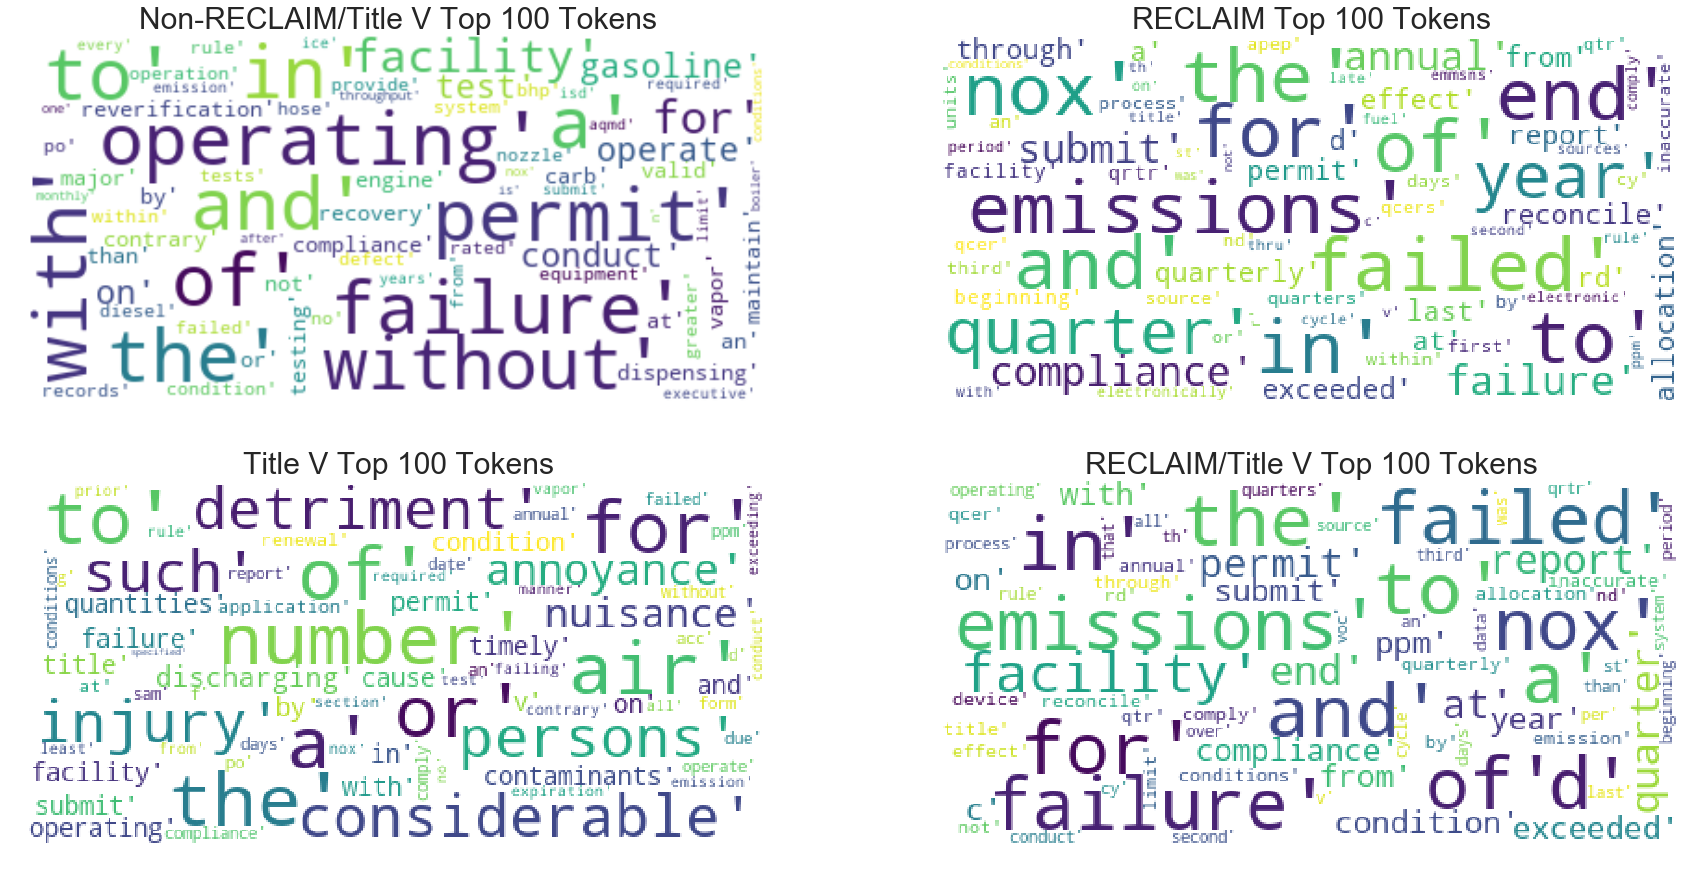

In [409]:
fig, axes = plt.subplots(2, 2, figsize=(30, 15))

ax = axes[0, 0]
ax.imshow(create_wordcloud(none_top100), interpolation="bilinear")
ax.axis('off')
ax.set_title("Non-RECLAIM/Title V Top 100 Tokens", fontsize=30)

ax = axes[0, 1]
ax.imshow(create_wordcloud(reclaim_top100))
ax.axis('off')
ax.set_title("RECLAIM Top 100 Tokens", fontsize=30)

ax = axes[1, 0]
ax.imshow(create_wordcloud(titlev_top100))
ax.axis('off')
ax.set_title("Title V Top 100 Tokens", fontsize=30)

ax = axes[1, 1]
ax.imshow(create_wordcloud(reclaim_titlev_top100))
ax.axis('off')
ax.set_title("RECLAIM/Title V Top 100 Tokens", fontsize=30)
plt.show()

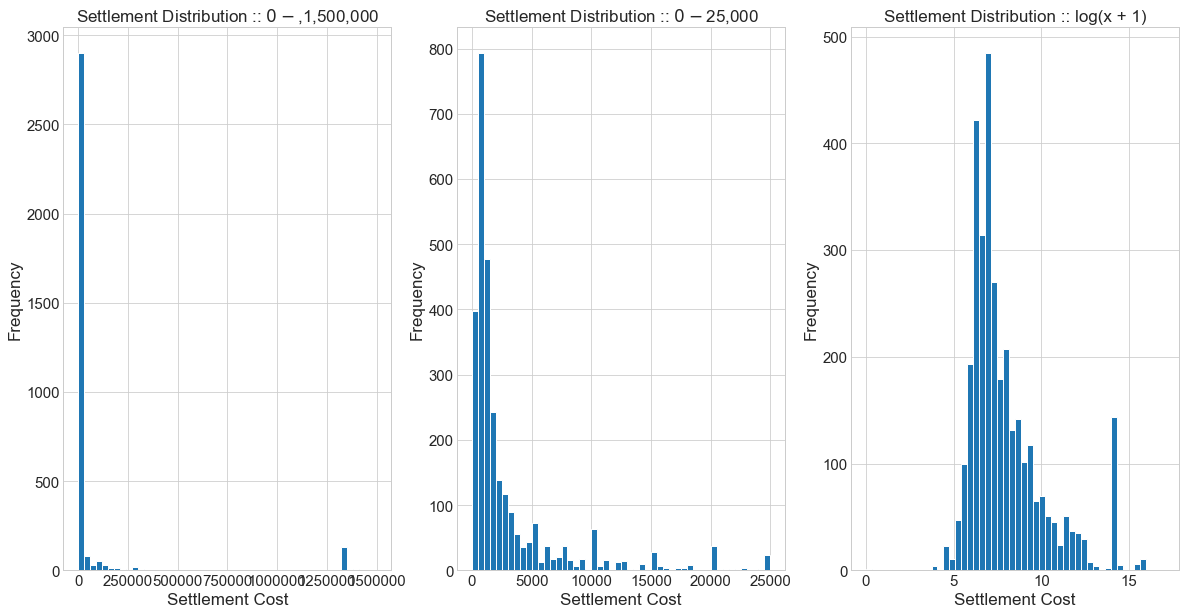

In [299]:
plt.subplot(1, 3, 1)
(df_all['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_all['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_all['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

#https://www.quora.com/What-are-the-downsides-when-using-log-x-+-1-as-ones-log-transformation
#http://onbiostatistics.blogspot.com/2012/05/logx1-data-transformation.html

In [300]:
facility_count = df_all[['Total','facility_type']].groupby(['facility_type'], as_index =False).count()
facility_count

,facility_type,Total
0,n,2552
1,r,142
2,rt,282
3,t,360


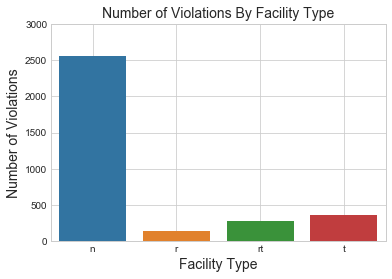

In [301]:
sns.barplot(facility_count['facility_type'], facility_count['Total'])
plt.grid(True)
plt.ylim(0, 3000, 100)
plt.xlabel('Facility Type', fontsize = 14)
plt.ylabel('Number of Violations', fontsize = 14)
plt.title('Number of Violations By Facility Type', fontsize = 14)
plt.show()

In [302]:
df_none = df_all[df_all['facility_type'] == 'n'].reset_index(drop=True)
df_rt = df_all[df_all['facility_type'] == 'rt'].reset_index(drop=True)
df_r = df_all[df_all['facility_type'] == 'r'].reset_index(drop=True)
df_t = df_all[df_all['facility_type'] == 't'].reset_index(drop=True)

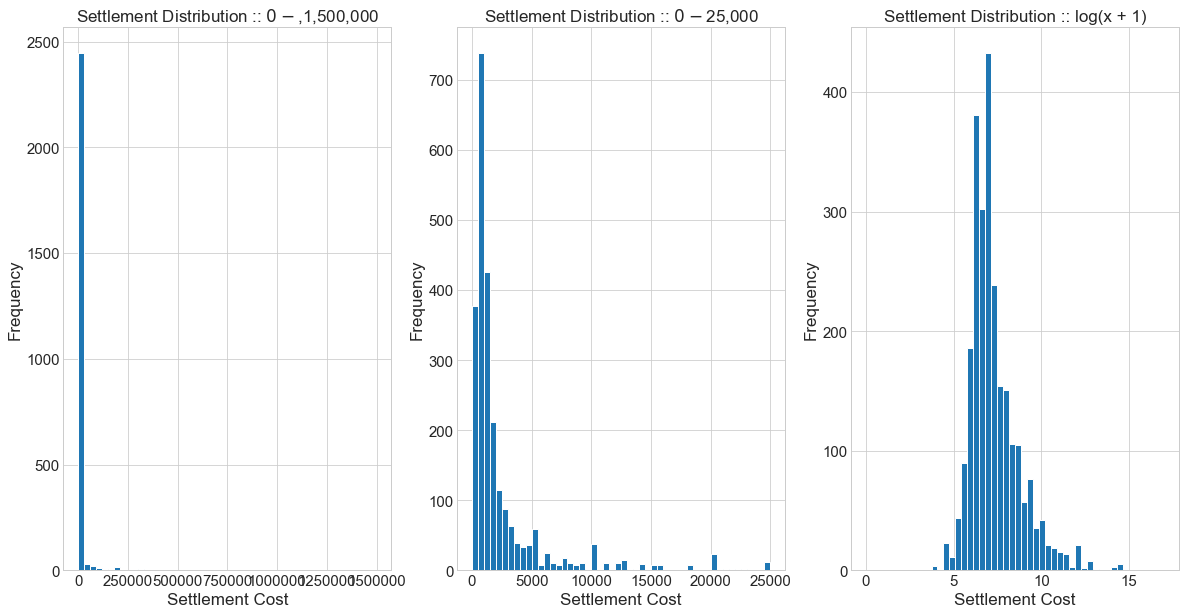

In [303]:
plt.subplot(1, 3, 1)
(df_none['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_none['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_none['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

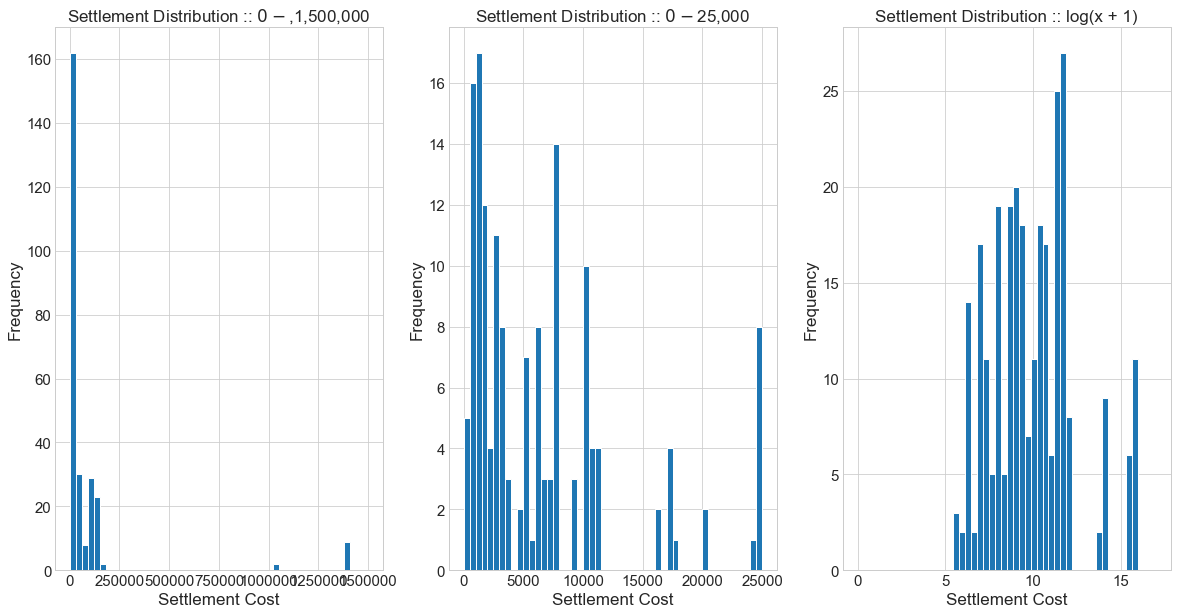

In [304]:
plt.subplot(1, 3, 1)
(df_rt['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_rt['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_rt['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

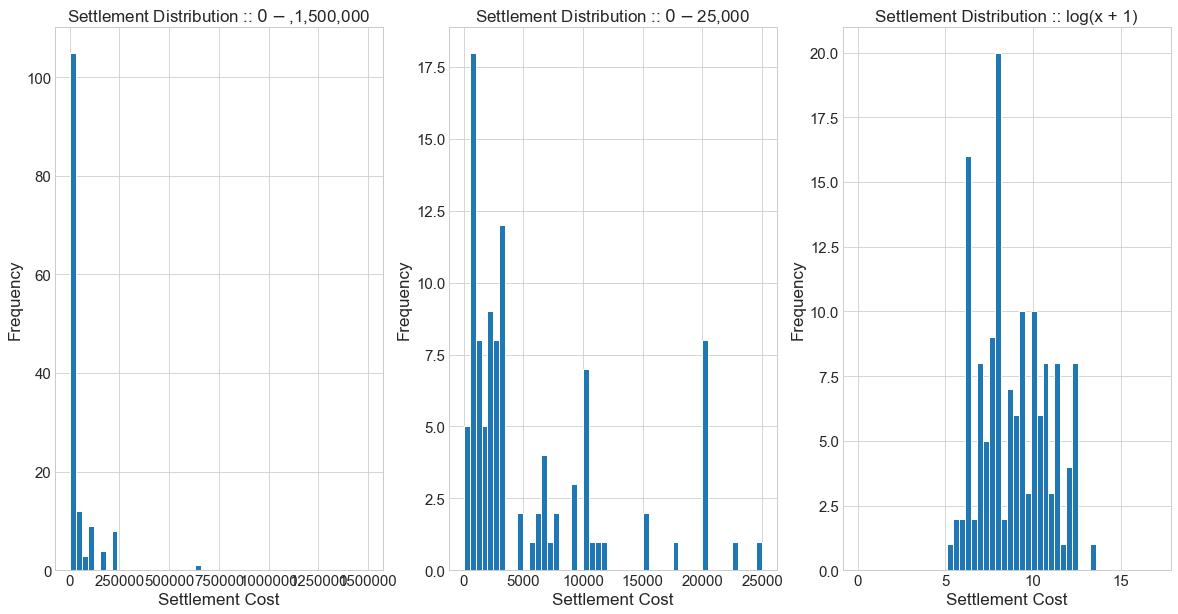

In [305]:
plt.subplot(1, 3, 1)
(df_r['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_r['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_r['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

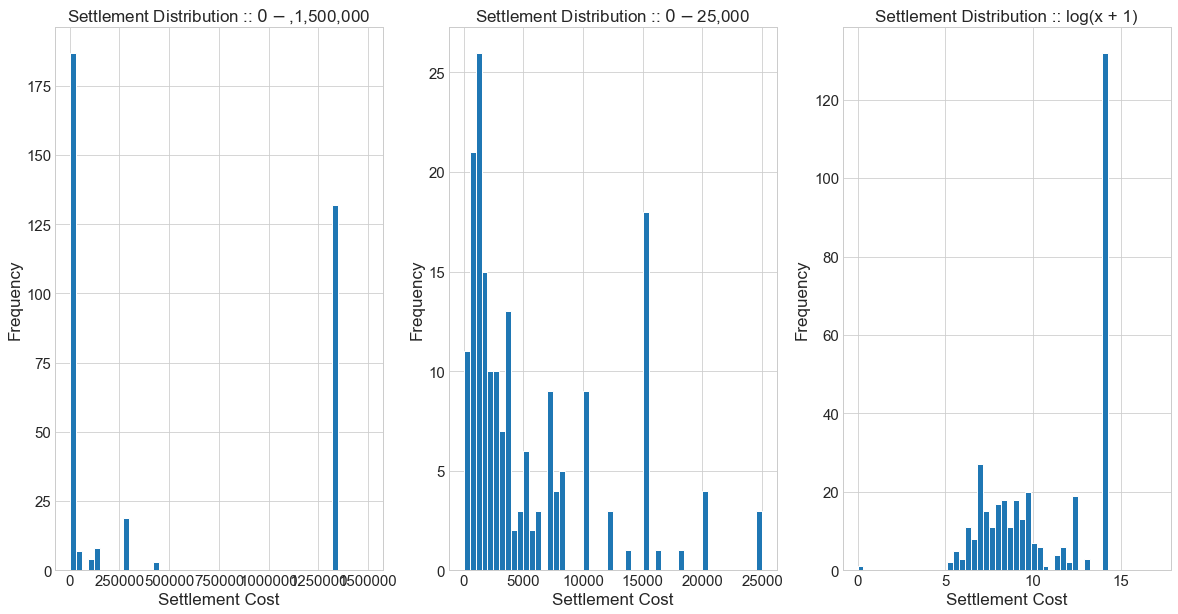

In [306]:
plt.subplot(1, 3, 1)
(df_t['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1500000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$,1,500,000', fontsize=17)

plt.subplot(1, 3, 2)
(df_t['Total']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,25000])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: $0-$25,000', fontsize=17)

plt.subplot(1, 3, 3)
(np.log(df_t['Total'] + 1)).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,17])
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Settlement Distribution :: log(x + 1)', fontsize=17)
plt.show()

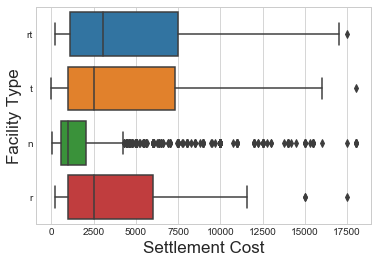

In [307]:
sns.set_style('whitegrid')
data = df_all[df_all['Total'] < 20000]
ax = sns.boxplot(x="Total", y="facility_type", data=data)
plt.xlabel('Settlement Cost', fontsize=17)
plt.ylabel('Facility Type', fontsize=17)
plt.show()

In [308]:
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))

In [309]:
X = df_all['violation_data']
y = df_all['facility_type']

In [310]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type,trim_violation_text,violation_length
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt,failed to reconcile quarterly nox emissions in...,42
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt,inaccurate qcers inaccurate apep,4
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t,failure to keep the roof of internal floating ...,22
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t,failure to operate and maintain a continuous m...,14
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n,selling architectural coatings within the scaq...,25


In [311]:
def determine_length(d):
    d = d.split(' ')
    return len(d)

In [312]:
df_all['violation_length'] = df_all['trim_violation_text'].apply(determine_length)

In [313]:
df_all.iloc[1]['trim_violation_text'].split(' ')

['inaccurate', 'qcers', 'inaccurate', 'apep']

In [314]:
df_all.iloc[1]['violation_length']

4

In [316]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,facility_type,trim_violation_text,violation_length
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failed to reconcile quarterly nox emissions in...,NOX RECLAIM facility,rt,failed to reconcile quarterly nox emissions in...,42
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,inaccurate qcers inaccurate apep,NOx RECLAIM facility,rt,inaccurate qcers inaccurate apep,4
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to keep the roof of internal floating ...,NaN,t,failure to keep the roof of internal floating ...,22
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,failure to operate and maintain a continuous m...,NaN,t,failure to operate and maintain a continuous m...,14
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,selling architectural coatings within the scaq...,NaN,n,selling architectural coatings within the scaq...,25


In [317]:
df_len_cost = df_all[['Total', 'violation_length']].groupby(['violation_length'], as_index=False).mean()
df_len_cost.head()

,violation_length,Total
0,1,5187.500000
1,2,765327.272727
2,3,35393.750000
3,4,31681.250000
4,5,121657.500000


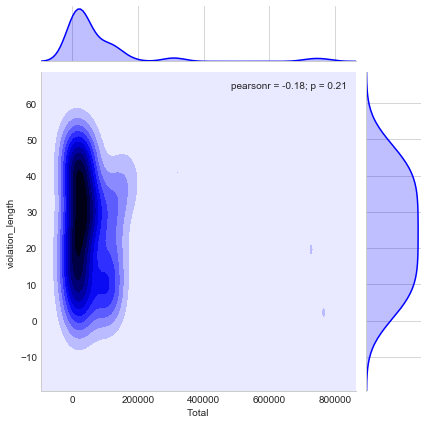

In [318]:
plt.figure(figsize = (10, 10))
sns.jointplot(x=df_len_cost["Total"], y=df_len_cost["violation_length"], kind='kde', color = 'b')
plt.show()

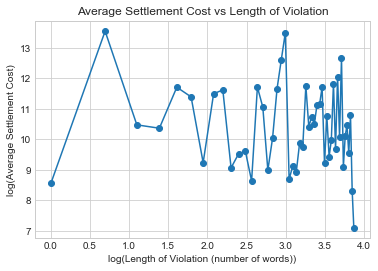

In [319]:
x = np.log(df_len_cost['violation_length'])
y = np.log(df_len_cost['Total'])
plt.scatter(x, y)
plt.plot(x, y)
plt.ylabel('log(Average Settlement Cost)')
plt.xlabel('log(Length of Violation (number of words))')
plt.title('Average Settlement Cost vs Length of Violation')
plt.show()

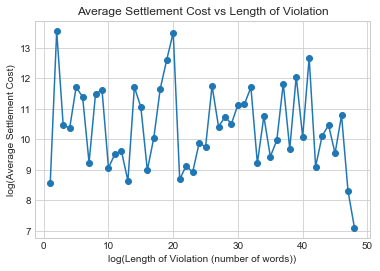

In [320]:
x = (df_len_cost['violation_length'])
y = np.log(df_len_cost['Total'])
plt.scatter(x, y)
plt.plot(x, y)
plt.ylabel('log(Average Settlement Cost)')
plt.xlabel('log(Length of Violation (number of words))')
plt.title('Average Settlement Cost vs Length of Violation')
plt.show()

This is a PCA of the initial dataset using `n_components = 2`

In [321]:
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
X_dtm = vect.fit_transform(X)
pca = PCA(n_components = 2)
pca_results = pca.fit_transform(X_dtm.toarray())
print('Size of Feature Vector is: ', len(X_dtm.toarray()[0]))

Size of Feature Vector is:  98


In [322]:
pca.explained_variance_ratio_

array([ 0.32350814,  0.16010864])

In [323]:
print('Total Variance', (pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]) * 100, '%')

Total Variance 48.3616776575 %


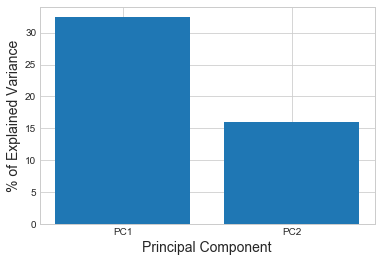

In [324]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x = range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 14)
plt.ylabel('% of Explained Variance', fontsize = 14)
plt.show()

In [325]:
pca_df = pd.DataFrame(pca_results, columns=['x', 'y'])
pca_df['violation_text'] = df_all['violation_data']
pca_df['facility_type'] = df_all['facility_type']
pca_df['Total_Settlement'] = df_all['Total']

In [326]:
pca_df.head()

,x,y,violation_text,facility_type,Total_Settlement
0,-0.211480,-0.394044,failed to reconcile quarterly nox emissions in...,rt,7200.00
1,-0.173292,-0.238447,inaccurate qcers inaccurate apep,rt,7200.00
2,-0.173292,-0.238447,failure to keep the roof of internal floating ...,t,3500.00
3,-0.173292,-0.238447,failure to operate and maintain a continuous m...,t,3500.00
4,-0.173292,-0.238447,selling architectural coatings within the scaq...,n,9438.66


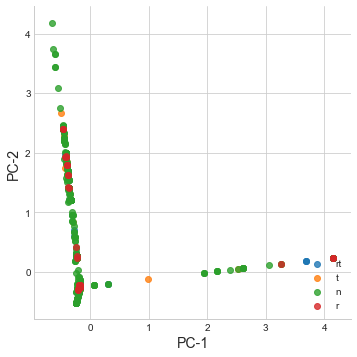

In [327]:
sns.lmplot( x="x", y="y", data=pca_df, fit_reg=False, hue='facility_type', legend=False)
plt.legend(loc='lower right')
plt.xlabel('PC-1', fontsize = 14)
plt.ylabel('PC-2', fontsize = 14)
plt.show()

This is a tSNE of the initial dataset using `learning_rate=100` and `perplexity=40`

In [328]:
X = df_all['violation_data']
y = df_all['facility_type']
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
X_dtm = vect.fit_transform(X)

In [329]:
start = time.time()

model = TSNE(learning_rate=100, perplexity=40)
transformed = model.fit_transform(X_dtm.toarray())

end = time.time()
print('Elapsed time: ', end - start, 'seconds')

Elapsed time:  99.71999192237854 seconds


In [350]:
tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
tsne_df['violation_text'] = df_all['trim_violation_text']
tsne_df['facility_type'] = df_all['facility_type']
tsne_df['Total_Settlement'] = df_all['Total']
tsne_df.head()

,x,y,violation_text,facility_type,Total_Settlement
0,-32.397289,-8.791542,failed to reconcile quarterly nox emissions in...,rt,7200.00
1,-2.187796,0.769819,inaccurate qcers inaccurate apep,rt,7200.00
2,-4.004399,1.382300,failure to keep the roof of internal floating ...,t,3500.00
3,-2.682770,1.209139,failure to operate and maintain a continuous m...,t,3500.00
4,-2.842620,1.080713,selling architectural coatings within the scaq...,n,9438.66


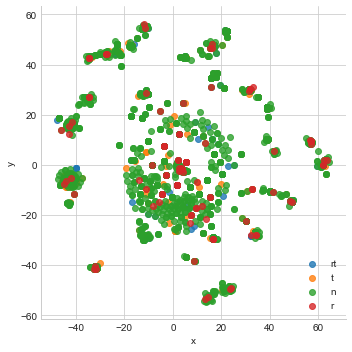

In [331]:
plt.figure(figsize=(20,10))
sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, hue='facility_type', legend=False)
plt.legend(loc='lower right')
plt.show()

This is a SVD of the initial dataset using `n_components = 2`

In [332]:
X = df_all['violation_data']
y = df_all['facility_type']
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
X_dtm = vect.fit_transform(X)

In [333]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd_ctv = svd.fit_transform(X_dtm)

In [351]:
svd_df = pd.DataFrame(svd_ctv, columns=['x', 'y'])
svd_df['violation_text'] = df_all['trim_violation_text']
svd_df['facility_type'] = df_all['facility_type']
svd_df['Total_Settlement'] = df_all['Total']
svd_df.head()

,x,y,violation_text,facility_type,Total_Settlement
0,2.611115e-09,-2.946375e-07,failed to reconcile quarterly nox emissions in...,rt,7200.00
1,1.260570e-19,-5.038363e-18,inaccurate qcers inaccurate apep,rt,7200.00
2,-2.628991e-19,4.193299e-17,failure to keep the roof of internal floating ...,t,3500.00
3,-8.308975e-21,7.641118e-19,failure to operate and maintain a continuous m...,t,3500.00
4,1.020222e-20,-6.323107e-19,selling architectural coatings within the scaq...,n,9438.66


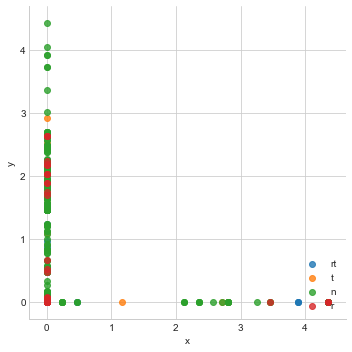

In [335]:
plt.figure(figsize=(20,10))
sns.lmplot( x="x", y="y", data=svd_df, fit_reg=False, hue='facility_type', legend=False)
plt.legend(loc='lower right')
plt.show()

k-Means

In [352]:
X = df_all['trim_violation_text']
y = df_all['facility_type']
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
X_dtm = vect.fit_transform(X)
print('Size of Feature Vector is: ', len(X_dtm.toarray()[0]))

Size of Feature Vector is:  98


In [353]:
start = time.time()

metric_ = []
silhouette_avg_ = []
for i in range(2, 25):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(X_dtm)
    metric_.append(kmeans.inertia_)
    labels = kmeans.predict(X_dtm)
    silhouette_avg = silhouette_score(X_dtm, labels)
    silhouette_avg_.append(silhouette_avg)

end = time.time()
print('Elapsed time: ', end - start, 'seconds')

Elapsed time:  16.49623394012451 seconds


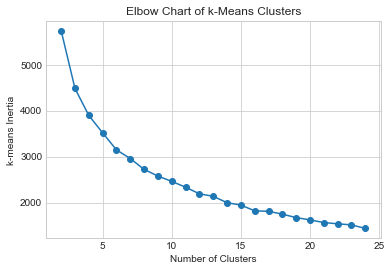

In [354]:
cluster = [x for x in range(2, 25)]
plt.scatter(cluster, metric_)
plt.plot(cluster, metric_)
plt.ylabel('k-means Inertia')
plt.xlabel('Number of Clusters')
plt.title('Elbow Chart of k-Means Clusters')
plt.show()

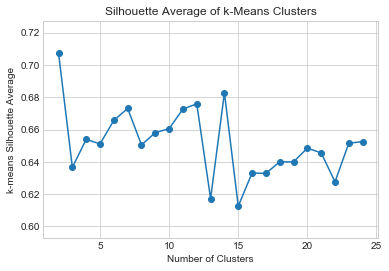

In [355]:
cluster = [x for x in range(2, 25)]
plt.scatter(cluster, silhouette_avg_)
plt.plot(cluster, silhouette_avg_)
plt.ylabel('k-means Silhouette Average')
plt.xlabel('Number of Clusters')
plt.title('Silhouette Average of k-Means Clusters')
plt.show()

In [356]:
silhouette_avg_

[0.70735448025767356,
 0.63656584787553794,
 0.65390424200296726,
 0.6510859604065462,
 0.66564172171420866,
 0.67306086625088102,
 0.65047513919888722,
 0.65802885357637597,
 0.6605519885232759,
 0.67270415517051974,
 0.67587547965489492,
 0.61723884898192216,
 0.68275336731151315,
 0.61255903652670829,
 0.63308160697815807,
 0.63281698821614363,
 0.64000256460168137,
 0.63994252619880632,
 0.64848175254241147,
 0.6455149639192661,
 0.62762006781954927,
 0.65155671635690648,
 0.65246865759865602]

In [362]:
silhouette_avg_[5]

0.67306086625088102

In [490]:
X_dtm = vect.fit_transform(X)
kmeans = KMeans(n_clusters=7, random_state=10)
kmeans.fit(X_dtm)
labels = kmeans.predict(X_dtm)
labels

array([5, 1, 1, ..., 1, 1, 1], dtype=int32)

In [473]:
kmeans_df = pd.DataFrame()
kmeans_df['violation_text'] = df_all['trim_violation_text']
kmeans_df['facility_type'] = df_all['facility_type']
kmeans_df['Total_Settlement'] = df_all['Total']
kmeans_df['Cluster'] = labels
kmeans_df.head(10)

,violation_text,facility_type,Total_Settlement,Cluster
0,failed to reconcile quarterly nox emissions in...,rt,7200.00,5
1,inaccurate qcers inaccurate apep,rt,7200.00,1
2,failure to keep the roof of internal floating ...,t,3500.00,1
3,failure to operate and maintain a continuous m...,t,3500.00,1
4,selling architectural coatings within the scaq...,n,9438.66,1
5,failure to conduct reverification test months ...,n,1000.00,1
6,failure to post permit on site failure to prov...,n,1000.00,1
7,operating a gasoline dispensing facility contr...,n,1000.00,3
8,two vapor recovery hoses leaking above ppm voc...,t,3000.00,1
9,operating an ajax boiler rated at million btuh...,n,2500.00,1


In [474]:
facility_type_ = dict()
type_list = range(0, 7)
for each in type_list:
    text = ' '.join(kmeans_df.loc[kmeans_df['Cluster'] == each, 'violation_text'].values)
    facility_type_[each] = word_tokenize(text)

In [509]:
group_zero = Counter(facility_type_[0]).most_common(100)
group_one = Counter(facility_type_[1]).most_common(100)
group_two = Counter(facility_type_[2]).most_common(100)
group_three = Counter(facility_type_[3]).most_common(100)
group_four = Counter(facility_type_[4]).most_common(100)
group_five = Counter(facility_type_[5]).most_common(100)
group_six = Counter(facility_type_[6]).most_common(100)

In [510]:
def create_wordcloud(d):
    wordcloud = WordCloud(background_color='white',
                          max_words=50, 
                          max_font_size=40,
                          random_state=42).generate(str(d))
    return wordcloud

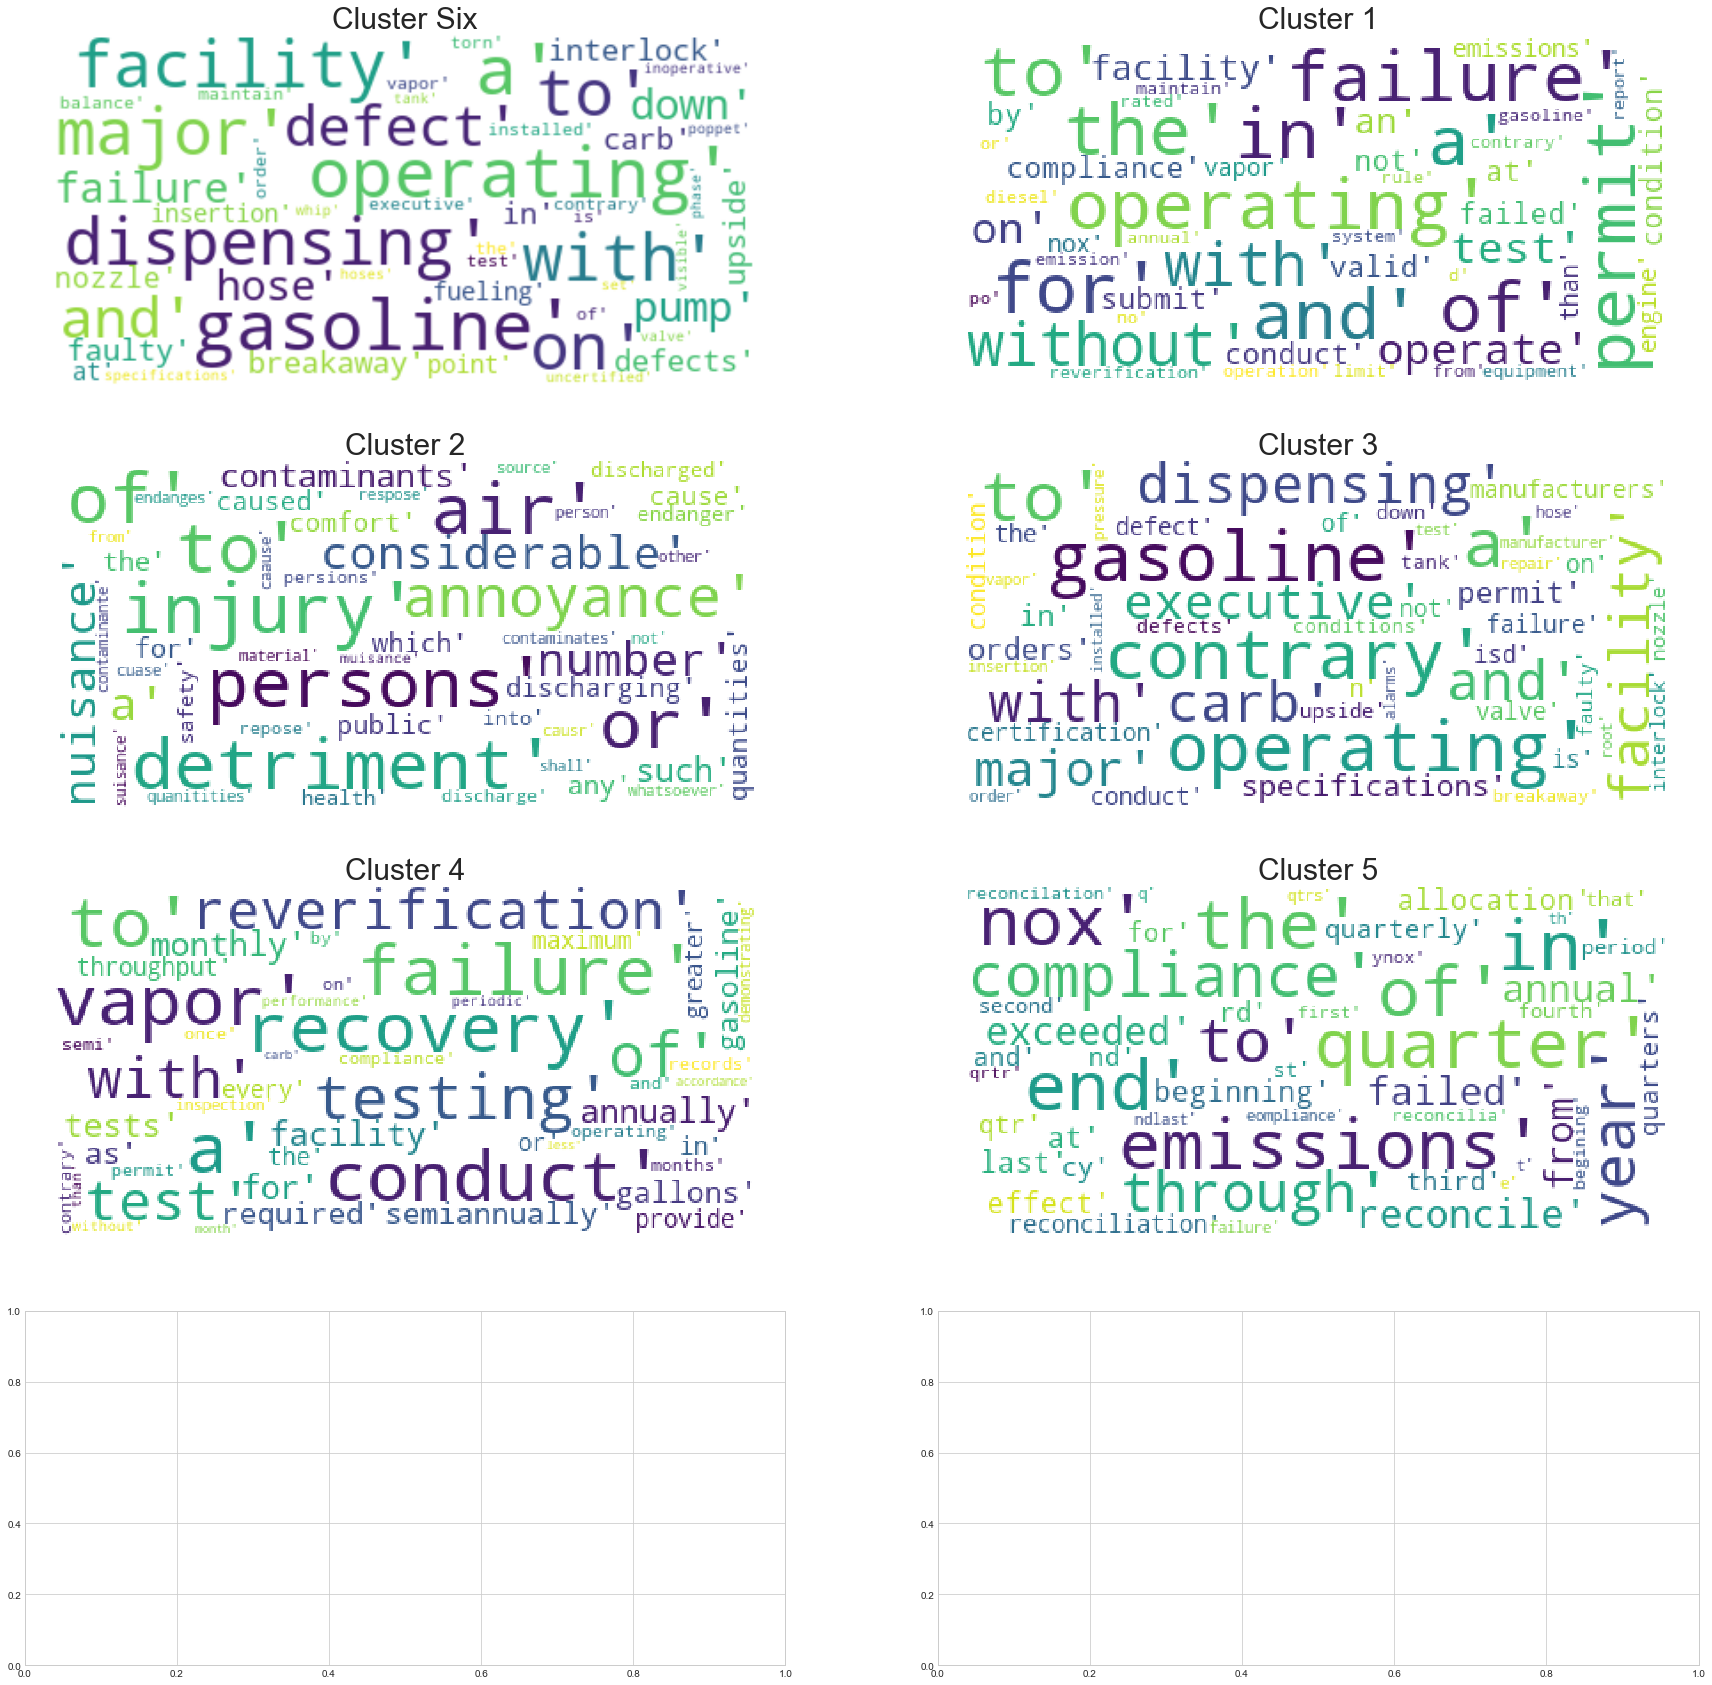

In [515]:
fig, axes = plt.subplots(4, 2, figsize=(30, 30))

ax = axes[0, 0]
ax.imshow(create_wordcloud(group_zero), interpolation="bilinear")
ax.axis('off')
ax.set_title("Cluster Six", fontsize=30)

ax = axes[0, 1]
ax.imshow(create_wordcloud(group_one))
ax.axis('off')
ax.set_title("Cluster 1", fontsize=30)

ax = axes[1, 0]
ax.imshow(create_wordcloud(group_two))
ax.axis('off')
ax.set_title("Cluster 2", fontsize=30)

ax = axes[1, 1]
ax.imshow(create_wordcloud(group_three))
ax.axis('off')
ax.set_title("Cluster 3", fontsize=30)

ax = axes[2, 0]
ax.imshow(create_wordcloud(group_four))
ax.axis('off')
ax.set_title("Cluster 4", fontsize=30)

ax = axes[2, 1]
ax.imshow(create_wordcloud(group_five))
ax.axis('off')
ax.set_title("Cluster 5", fontsize=30)
plt.show()

ax = axes[3, 0]
ax.imshow(create_wordcloud(group_six))
ax.axis('off')
ax.set_title("Cluster 6", fontsize=30)
plt.show()

In [485]:
df_cross_tab = kmeans_df.iloc[:, 1:4]
cross_tab_summary = pd.crosstab(df_cross_tab['facility_type'], df_cross_tab['Cluster'])
cross_tab_summary 

Cluster,0,1,2,3,4,5,6
facility_type,,,,,,,
n,147,2143,11,110,95,1,45
r,0,113,2,1,0,26,0
rt,0,262,0,1,0,19,0
t,0,208,152,0,0,0,0


In [443]:
start = time.time()

model = TSNE(learning_rate=100, perplexity=50)
transformed = model.fit_transform(X_dtm.toarray())

end = time.time()
print('Elapsed time: ', end - start, 'seconds')

Elapsed time:  111.4337329864502 seconds


In [447]:
tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
tsne_df['violation_text'] = kmeans_df['violation_text']
tsne_df['facility_type'] = kmeans_df['facility_type']
tsne_df['Total_Settlement'] = kmeans_df['Total_Settlement'] 
tsne_df['Cluster'] = labels

In [449]:
tsne_df['violation_text'].isnull().sum()

303

In [554]:
tsne_df.iloc[3]['violation_text']

'failure to operate and maintain a continuous monitoring system cms according to rule plan'

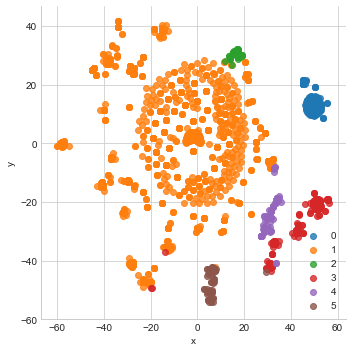

In [370]:
plt.figure(figsize=(20,10))
sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, hue='Cluster', legend=False)
plt.legend(loc='lower right')
plt.show()

In [486]:
def tsne_run(lr, perp):
    start = time.time()

    X = df_all['violation_data']
    y = df_all['facility_type']

    min_df = 0.01
    max_df = 0.90

    vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,4))
    X_dtm = vect.fit_transform(X)

    kmeans = KMeans(n_clusters=6, random_state=10)
    kmeans.fit(X_dtm)
    labels = kmeans.predict(X_dtm)
    
    kmeans_df = pd.DataFrame()
    kmeans_df['violation_text'] = df_all['trim_violation_text']
    kmeans_df['facility_type'] = df_all['facility_type']
    kmeans_df['Total_Settlement'] = df_all['Total']
    kmeans_df['Cluster'] = labels

    model = TSNE(learning_rate=lr, perplexity=perp)
    transformed = model.fit_transform(X_dtm.toarray())

    tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
    tsne_df['violation_text'] = kmeans_df['violation_text']
    tsne_df['facility_type'] = kmeans_df['facility_type']
    tsne_df['Total_Settlement'] = kmeans_df['Total_Settlement'] 
    tsne_df['Cluster'] = labels

    plt.figure(figsize=(20,10))
    sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, hue='Cluster', legend=False)
    plt.legend(loc='lower right')
    plt.show()

    end = time.time()
    print('Elapsed time: ', end - start, 'seconds')

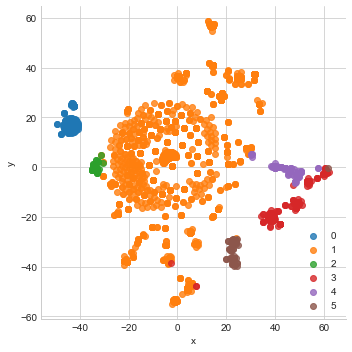

Elapsed time:  120.3047547340393 seconds


In [487]:
tsne_run(90, 50)

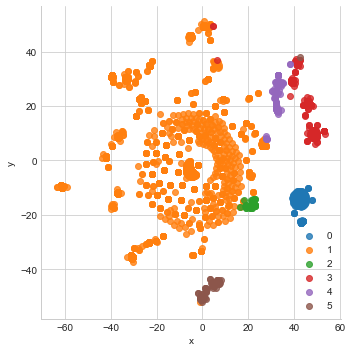

Elapsed time:  123.69822692871094 seconds


In [488]:
tsne_run(100, 50)

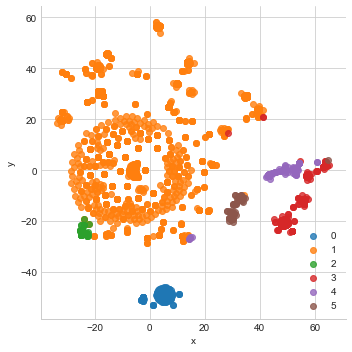

Elapsed time:  115.99584794044495 seconds


In [489]:
tsne_run(150, 50)

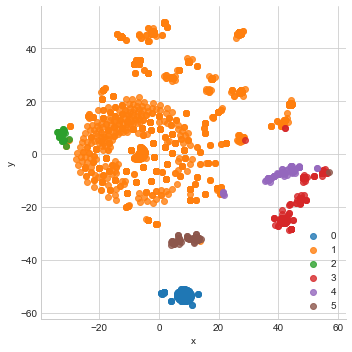

Elapsed time:  122.32512784004211 seconds


In [491]:
tsne_run(200, 50)

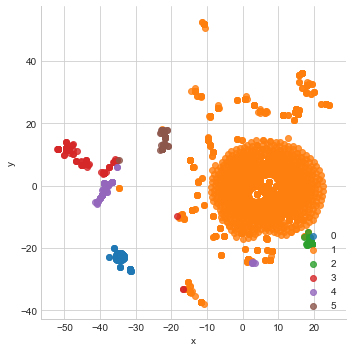

Elapsed time:  127.05285811424255 seconds


In [492]:
tsne_run(250, 50)

In [577]:
#https://stackoverflow.com/questions/24647400/what-is-the-best-stemming-method-in-python
#https://pythonprogramming.net/stemming-nltk-tutorial/

In [586]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [587]:
lmtzr = WordNetLemmatizer()
ps = PorterStemmer()

In [588]:
a = 'failure to operate and maintain a continuous monitoring system cms according to rule plan'
a_list = a.split(' ')
list_= [lmtzr.lemmatize(each) for each in a_list]
b = ' '.join(list_)
a_list = b.split(' ')
list_= [ps.stem(each) for each in a_list]
a = ' '.join(list_)

In [589]:
a

'failur to oper and maintain a continu monitor system cm accord to rule plan'

In [590]:
b

'failure to operate and maintain a continuous monitoring system cm according to rule plan'